In [1]:
# Copyright 2025 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Let Gemini 2.5 Do the Math Magic!



| Authors |
| --- |
| [Laxmi Harikumar](https://github.com/laxmi-genai)

## Overview



[Gemini 2.5 Pro Experimental](https://cloud.google.com/vertex-ai/generative-ai/docs/thinking) is Google's most advanced model for complex tasks. It tops the LMArena leaderboard — which measures human preferences — by a significant margin, indicating a highly capable model equipped with high-quality style. 2.5 Pro also shows strong reasoning and code capabilities, leading on common coding, math and science benchmarks.

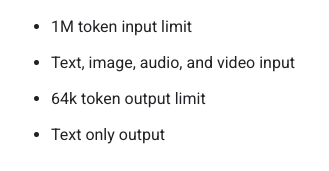

### Objectives

In this tutorial, you will learn how to use the Gemini API and the Google Gen AI SDK for Python with the Gemini 2.5 Pro model.

This notebook provides an example of the model solving a mathematical puzzle!

## Getting Started

### Install Google Gen AI SDK for Python


In [2]:
%pip install --upgrade --quiet google-genai

### Authenticate your notebook environment (Colab only)

If you are running this notebook on Google Colab, run the cell below to authenticate your environment.

In [4]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

### Connect to a generative AI API service

Google Gen AI APIs and models including Gemini are available in the following two API services:

- **[Gemini Developer API](https://ai.google.dev/gemini-api/docs)**: Experiment, prototype, and deploy small projects.
- **[Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/overview)**: Build enterprise-ready projects on Google Cloud.

The Google Gen AI SDK provides a unified interface to these two API services.

### Import libraries


In [16]:
from IPython.display import HTML, Image, Markdown, display
from google import genai
from google.genai.types import GenerateContentConfig, ThinkingConfig, SafetySetting, Part

### Set up Google Cloud Project

 [Enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com) in your Google Cloud project.

In [6]:
import os

PROJECT_ID = "[your-project-id]"  # @param {type: "string", placeholder: "[your-project-id]", isTemplate: true}
if not PROJECT_ID or PROJECT_ID == "[your-project-id]":
    PROJECT_ID = str(os.environ.get("GOOGLE_CLOUD_PROJECT"))

LOCATION = os.environ.get("GOOGLE_CLOUD_REGION", "us-central1")

client = genai.Client(vertexai=True, project=PROJECT_ID, location=LOCATION)

## Use the Gemini 2.5 Pro model

### Load the Gemini 2.5 Pro model

Learn more about all [Gemini models on Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/learn/models#gemini-models).

In [7]:
MODEL_ID = "gemini-2.5-pro-exp-03-25"  # @param {type: "string"}

## Configure model parameters

You can include parameter values in each call that you send to a model to control how the model generates a response. The model can generate different results for different parameter values. You can experiment with different model parameters to see how the results change.

- Learn more about [experimenting with parameter values](https://cloud.google.com/vertex-ai/generative-ai/docs/learn/prompts/adjust-parameter-values).

- See a list of all [Gemini API parameters](https://cloud.google.com/vertex-ai/generative-ai/docs/model-reference/inference#parameters).


In [27]:
generate_content_config = GenerateContentConfig(
    temperature = 1,
    top_p = 1,
    seed = 0,
    max_output_tokens = 65535,
    response_modalities = ["TEXT"],
    safety_settings = [
        SafetySetting(
              category="HARM_CATEGORY_HATE_SPEECH",
              threshold="OFF"
            ),
      SafetySetting(
              category="HARM_CATEGORY_DANGEROUS_CONTENT",
              threshold="OFF"
            ),
      SafetySetting(
              category="HARM_CATEGORY_SEXUALLY_EXPLICIT",
              threshold="OFF"
            ),
      SafetySetting(
              category="HARM_CATEGORY_HARASSMENT",
              threshold="OFF"
            )
    ],
    thinking_config=ThinkingConfig(
        include_thoughts=True
    )
  )

### **Find the missing number!**:


In [28]:
image_file_path = "gemini_puzzles/maths_crossword.png"
image_file_uri = f"gs://{image_file_path}"
image_file_url = f"https://storage.cloud.google.com/{image_file_path}"

display(Image(url=image_file_url, width=400))

In [31]:
response = client.models.generate_content(
    model=MODEL_ID,
    config=generate_content_config,
    contents=[
        Part.from_uri(file_uri=image_file_uri, mime_type="image/png"),
        "Hey Gemini! Find the missing number",
    ],
)

display(Markdown(response.text))

1.  **Analyze the Structure:** The numbers are arranged in a stair-step pattern forming rows:
    *   Row 1: 6
    *   Row 2: 7, 5
    *   Row 3: 11, 3, ?
    *   Row 4: 17, 2, 4, 1

2.  **Look for Row Patterns:** Let's calculate the sum of the numbers in each row.
    *   Sum of Row 1 = 6
    *   Sum of Row 2 = 7 + 5 = 12
    *   Sum of Row 3 = 11 + 3 + ? = 14 + ?
    *   Sum of Row 4 = 17 + 2 + 4 + 1 = 24

3.  **Identify Sequence in Row Sums:** The sums are 6, 12, (14 + ?), 24.
    *   Let's look at the differences between consecutive sums:
        *   Difference between Row 2 sum and Row 1 sum = 12 - 6 = 6.
        *   Difference between Row 4 sum and presumed Row 3 sum = 24 - (14 + ?)
        *   Difference between presumed Row 3 sum and Row 2 sum = (14 + ?) - 12 = 2 + ?

4.  **Hypothesize an Arithmetic Progression:** If the row sums form an arithmetic progression, the difference between consecutive terms should be constant. The first known difference is 6. Let's assume the common difference is 6.
    *   Row 1 sum = 6
    *   Row 2 sum = 6 + 6 = 12 (Matches the calculated sum)
    *   Row 3 sum = 12 + 6 = 18
    *   Row 4 sum = 18 + 6 = 24 (Matches the calculated sum)

5.  **Solve for the Missing Number:** According to the arithmetic progression hypothesis, the sum of Row 3 should be 18.
    *   We calculated the sum of Row 3 as 14 + ?.
    *   Set the calculated sum equal to the required sum: 14 + ? = 18.
    *   Solve for ?: ? = 18 - 14 = 4.

6.  **Conclusion:** The pattern suggests that the sums of the numbers in each row form an arithmetic sequence (6, 12, 18, 24) with a common difference of 6. For this pattern to hold, the missing number (?) must be 4.

The missing number is 4.

## What's next

- See the [Google Gen AI SDK reference docs](https://googleapis.github.io/python-genai/).
- Explore other notebooks in the [Google Cloud Generative AI GitHub repository](https://github.com/GoogleCloudPlatform/generative-ai).
- Explore AI models in [Model Garden](https://cloud.google.com/vertex-ai/generative-ai/docs/model-garden/explore-models).